# 時系列モデルの演習課題
1. 時系列モデルについて学習します。
2. 株価データの時系列分析について学習します。**[補足]** 


## 0. 事前準備

In [4]:
# ランタイムを再起動したらこちらのセルを実行してください。
import statsmodels

statsmodels.__version__

'0.13.2'

## 1. 時系列モデルについて学習します。

まずは、コンテンツでも扱った航空会社の乗客数データを用いて、時系列分析の一連の流れや多様なモデルについての学習を行います。

### 1.1 次の`df_passengets`は、1949年から1960年までのある航空会社の乗客数を格納したDataFrameになっています。次のセルを実行してデータを確認してください。また、1958年以前を訓練用(`df_passengets_train`)、それ以降をテスト用(`df_passengers_test`)とします。

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline
df_passengers = sns.load_dataset('flights')

df_passengers_train = df_passengers[df_passengers['year'] <= 1958].copy()
df_passengers_test = df_passengers[df_passengers['year'] > 1958].copy()

display(df_passengers)
display(df_passengers_train)
display(df_passengers_test)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
115,1958,Aug,505
116,1958,Sep,404
117,1958,Oct,359
118,1958,Nov,310


,year,month,passengers
120,1959,Jan,360
121,1959,Feb,342
122,1959,Mar,406
123,1959,Apr,396
124,1959,May,420
125,1959,Jun,472
126,1959,Jul,548
127,1959,Aug,559
128,1959,Sep,463
129,1959,Oct,407


### 1.2 1.1で作成した`df_passengers_train`を用いて、横軸にインデックス、縦軸に乗客数をとった折れ線グラフを描画してください。

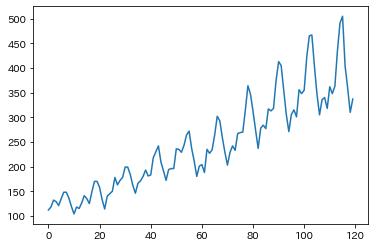

In [ ]:
plt.plot(df_passengers_train['passengers'])
plt.show()

折れ線グラフからわかるように、このデータは右肩上がりのトレンドに加えて周期的な変動があることがわかります。

つまり、典型的な非定常データです。

### 1.3 `df_passengers_train`を用いて、乗客数に対するラグ20までの自己相関を表したコレログラムを描画してください。

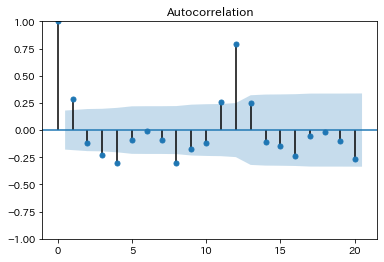

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
diff_passengers = df_passengers_train['passengers'].diff()
diff_passengers = diff_passengers.dropna()
fig = plot_acf(diff_passengers, lags=20)

これを見ると、乗客数のデータは**データを12期ずらした値との相関が高い**ことがわかります。

ここから、このデータは**12期ごとの周期がある**という結果が読み取れます。

また、値が図中の青背景部分の中に収まっていたら自己相関を持たないと考えることができます。

### 1.4 `df_passengers_train`を用いて、乗客数に対するラグ20までの偏自己相関を表したコレログラムを描画してください。

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


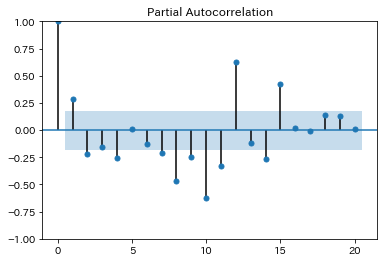

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plot_pacf(diff_passengers, lags=20)

これを見ると、4, 8, 10, 12といった遅れの値に対して偏自己相関の値が高いことがわかります。

ここから、**12ヶ月の周期は強く、四季の周期性が存在する**ということが読み取れます。

また、値が図中の青四角の中に収まっていたら自己相関を持たないと考えることができます。

### 1.5 1.3の結果と`df_passengers_train`を用いて、乗客数データのSTL分解を行ってください。その際には周期を1.3で得られた結果から自分で設定し、結果を描画することでトレンドや季節成分を確認してください。

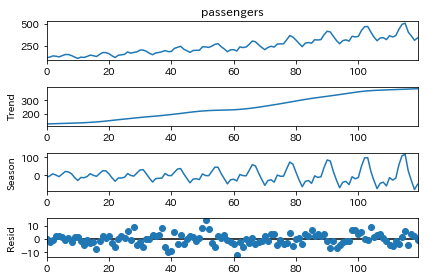

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(df_passengers_train['passengers'], period=12).fit()
fig = res.plot()

この結果から、乗客数のデータはトレンド成分が基本になっていて、それに加えて時期を増すごとに強い季節性が出てきていることがわかります。また、残差は極めて小さい値を取っています。このような非定常データに時系列モデルを適用してみます。

### 1.6 それでは、時系列モデルを用いたモデリングに移っていきます。まずは1.3の結果から、ARモデルの遅れを[1, 2, 11, 12]と設定します。ARモデルを用いて`df_passengers_train`の乗客数をモデリングしてください。その際には`statsmodels.tsa.arima.model.ARIMA`クラスを用いて、季節成分などは考慮しないようにしてください。また、モデルによって予測した結果を1.2の折れ線グラフと重ねて描画してください。

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


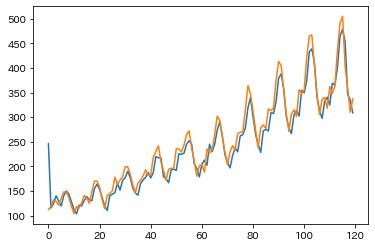

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(df_passengers_train['passengers'], order=([1, 2, 11, 12], 0, 0)).fit()
ar_pred = ar_model.predict()
plt.plot(ar_pred)
plt.plot(df_passengers_train['passengers'])
plt.show()

### 1.7 それでは、次は実際にテストデータに対する予測を行います。1.6のモデルを用いて、学習データ以降の24期にわたって予測を行い、`df_passengers_test`と重ねて描画してください。


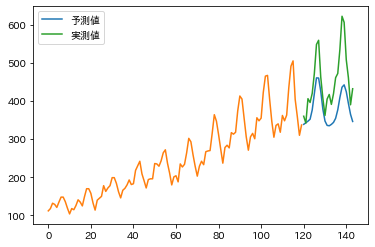

In [ ]:
test_pred = ar_model.predict(df_passengers_test.index[0], df_passengers_test.index[-1])
plt.plot(test_pred, label='予測値')
plt.plot(df_passengers_train['passengers'])
plt.plot(df_passengers_test['passengers'], label='実測値')
plt.legend()
plt.show()

このように、単純なARモデルを用いてトレンドや季節性を考慮したデータを予測することは難しいということがわかります。

### 1.8 1.7のように非定常なデータに対してARモデルはうまく機能しません。そこで、次はARIMAモデルを用いて1.6と同様にモデリングを行い、予測した結果を描画してください。また、AR部分の次数は1.5で推定したものを用いて、差分とMA部分の次数はどちらも1を指定してください。

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


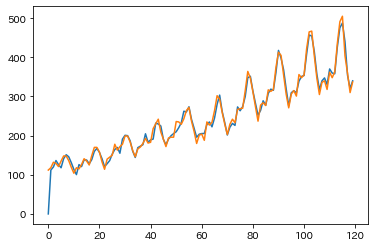

In [ ]:
model = ARIMA(df_passengers_train['passengers'], order=([1, 2, 11, 12], 1, 1)).fit()
y_pred = model.predict()
plt.plot(y_pred)
plt.plot(df_passengers_train['passengers'])
plt.show()

このように、ARIMAモデルを用いると**トレンドが強い非定常なデータ**に対してもうまくモデリングさせることができます。また、単純な季節性を持っているようなデータに対してAR部分の次数をうまく設定することで季節性のあるデータに対してもモデルを用いることもできます。

### 1.9 1.8ではうまくモデリングできているように思えます。そこで、次はモデルのAICを表示して精度を確認してください。

In [ ]:
model.aic

924.2058918234567

aicはモデルの精度と複雑さを同時に評価する指標で、低いほど良い指標になります。精度が良くなるほどAICの値は低くなり、モデルが複雑になる程AICの値は増加します。これは相対的な指標で、1つのモデルのaicでモデルを評価することはできません、


### 1.10 それでは、次は実際にテストデータに対する予測を行います。1.8のモデルを用いて、学習データ以降の24期にわたって予測を行い、`df_passengers_test`と重ねて描画してください。

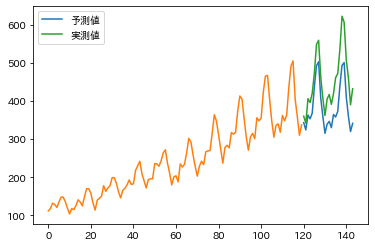

In [ ]:
pred = model.predict(df_passengers_test.index[0], df_passengers_test.index[-1])
plt.plot(pred, label='予測値')
plt.plot(df_passengers_train['passengers'])
plt.plot(df_passengers_test['passengers'], label='実測値')
plt.legend()
plt.show()

訓練データに対してうまく適合しているように見えましたが、予測データに対しては精度が出ませんでした。
\
予測に焦点を当ててモデルを評価するには、RMSEやMAPEと行った指標を用いる必要があります。

### 1.11 予測結果のテストデータに対するRMSE(平方根平均二乗誤差)とMAPE(平方根絶対パーセント誤差)を算出してください。

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_percentage_error
rmse = mean_squared_error(df_passengers_test['passengers'], pred, squared=False)
mape = mean_absolute_percentage_error(df_passengers_test['passengers'], pred)
print('RMSE: ', rmse)
print('MAPE: ', mape)

RMSE:  73.09781985759196
MAPE:  0.1454943764534179


MAPEは算出の際に実際の値が分母に来る指標であるため、データの値の大小に影響を受けてしまいます。そのため、評価指標にはRMSEのような平均的な誤差を算出した指標を用いることが一般的となっています。

またこれらも相対的な指標であるため、これだけでモデルを評価することはできません。

### 1.12 1.8ではうまくモデリングできているように見えましたが、1.10の結果を見ると予測結果は実際のデータと少しずれています。そこで、次はSARIMAモデルを用いてモデリングを行ってください。この際に、`statsmodels.tsa.statespace.sarimax.SARIMAX`クラスを用いて`trend`引数に`'t'`、`order`引数`に(2, 1, 1)`、`seasonal_order`引数に`(2, 0, 0, 12)`を指定してください。また、その結果を1.8のように描画してください。

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


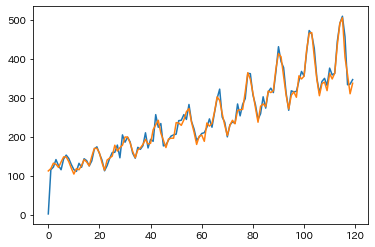

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(df_passengers_train['passengers'], order=(2, 1, 1), seasonal_order=(2, 0, 0, 12), trend='t').fit()
sarima_pred = sarima.predict()
plt.plot(sarima_pred)
plt.plot(df_passengers_train['passengers'])
plt.show()

これを見ると、SARIMAモデルはARIMAモデルと同様にうまく当てはまっているように見えます。

### 1.13 1.12もうまくモデリングできているように思えます。そこで、モデルのAICを表示してください。

In [ ]:
sarima.aic

1015.4316807486157

AICはARIMAモデルよりも少しだけ増加しました。このように、AICはモデルが複雑になる程増加します。ただし、ARIMAからSARIMAにするに従ってモデルを複雑にしたにもかかわらずAICがあまり変わらないということは、それだけ**精度が向上している**ということが考えられます。

### 1.14 1.12のモデルを用いて、1.10と同様に24期分の予測を行って実際のデータと重ね合わせて描画してください。

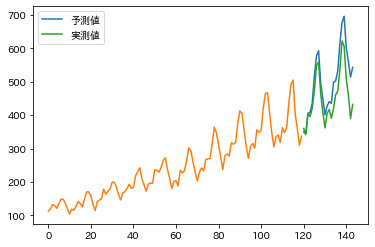

In [ ]:
s_pred = sarima.predict(df_passengers_test.index[0], df_passengers_test.index[-1])
plt.plot(s_pred, label='予測値')
plt.plot(df_passengers_train['passengers'])
plt.plot(df_passengers_test['passengers'], label='実測値')
plt.legend()
plt.show()

このように予測した結果を描画すると、ARIMAモデルよりもさらに精度が向上したと考えることができます。

ここで、ARIMAモデルと定量的に比較するための指標を用いて比較してみます。

### 1.15 予測結果のテストデータに対するRMSE(平方根平均二乗誤差)とMAPE(平方根絶対パーセント誤差)を算出してください。

In [ ]:
sarima_rmse = mean_squared_error(df_passengers_test['passengers'], s_pred, squared=False)
sarima_mape = mean_absolute_percentage_error(df_passengers_test['passengers'], s_pred)
print('RMSE: ', sarima_rmse)
print('MAPE: ', sarima_mape)

RMSE:  60.25815427672946
MAPE:  0.10757026519351287


どちらの指標を見ても、予測精度はARIMAモデルよりも改善したことがわかります。

このように、何を重視するかによって用いる指標を決める必要があります。

### 1.16 最後に状態空間モデルを用いて今後の予測を行います。次のセルを実行して、状態空間モデルを用いたモデリングを行なってください。

Optimization terminated successfully.
         Current function value: 3.711826
         Iterations: 461
         Function evaluations: 789
Optimization terminated successfully.
         Current function value: 3.711826
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


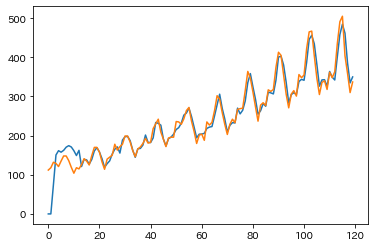

In [ ]:
# こちらのセルを実行してください。
from statsmodels.tsa.statespace.structural import UnobservedComponents

unobserved_components_model = UnobservedComponents(df_passengers_train['passengers'], level='local linear trend', seasonal=12)
res_model = unobserved_components_model.fit(method='bfgs', maxiter=500, start_params=unobserved_components_model.fit(method='nm', maxiter=500).params,)

plt.plot(res_model.predict())
plt.plot(df_passengers_train['passengers'])

plt.show()

このモデルは次のようなモデルとなっています。
- ある観測値(実際のデータ)は**今期の状態に今期のノイズを加えた値**となる。
- 今期の状態は**前期の状態に前期のトレンドを加えて今期のノイズを加えた値**となる。
- 今期のトレンドは**前期のトレンドに今期のノイズを加えた値**となる
- また、上記の式を基本に季節成分が考慮される。

この式をもとに状態空間モデルは推定されます。

### 1.17 1.16で作成したモデルに対してAICを算出してください。

In [ ]:
res_model.aic

898.838278830138

ARIMAモデルやSARIMAモデルを用いたモデリングに比べてAICがかなり低くなりました。

### 1.18 1.16のモデルを用いて、1.10と同様に24期分の予測を行って実際のデータと重ね合わせて描画してください。

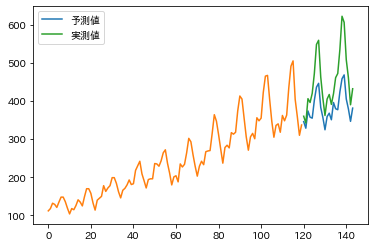

In [ ]:
res_pred = res_model.predict(df_passengers_test.index[0], df_passengers_test.index[-1])
plt.plot(res_pred, label='予測値')
plt.plot(df_passengers_train['passengers'])
plt.plot(df_passengers_test['passengers'], label='実測値')
plt.legend()
plt.show()

このモデルでは、トレンドをうまく掴めていないことがわかります。


### 1.19  状態空間モデルを用いると、データの分析まで行うことができます。データから推定された状態部分の推定値は`状態空間モデル.level['smoothed']`、トレンド成分は`状態空間モデル.trend['smoothed']`、季節成分は`状態空間モデル.seasonal['smoothed']`、残差は`状態空間モデル.resid`で取得できます。これらを元データと重ねて折れ線グラフで描画してください。

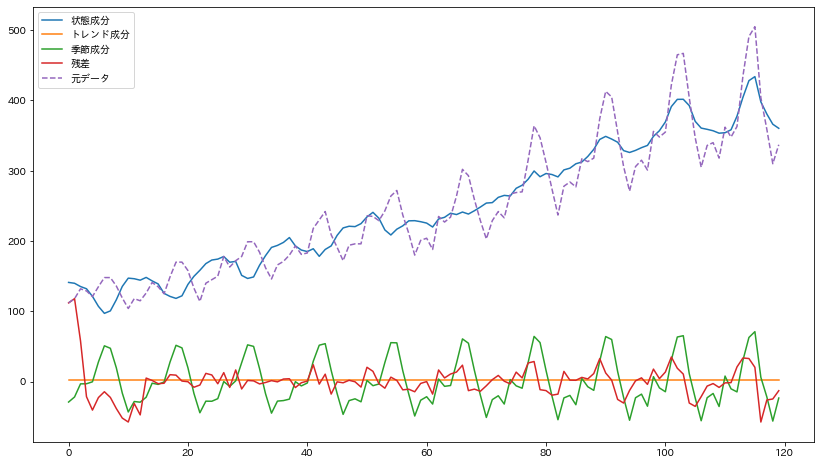

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(res_model.level['smoothed'], label='状態成分')
plt.plot(res_model.trend['smoothed'], label='トレンド成分')
plt.plot(res_model.seasonal['smoothed'], label='季節成分')
plt.plot(res_model.resid, label='残差')
plt.plot(df_passengers_train['passengers'], '--', label='元データ')
plt.legend()
plt.show()

このモデルを用いた推定では、**データにはトレンドがなく、ほとんどが季節成分と残差によって構成されている**という推定がされています。

状態空間は式をもとにモデルを推定するため、人間の直感とは離れた結果が出ることもあります。
\
また、状態空間モデルを用いて正確に予測を行うためにはある程度のデータ数が必要であること覚えておきましょう。

## 2. 株価データを用いて時系列分析や株価データの特徴について学習します。**[補足]** 

前提として、時系列モデルによって株価の予測を行うことは非常に難しいです。 それには例として次のような原因があります。
- データに定常性が認められない。
- 様々な要因が複雑に絡まっていて、過去の値だけで値が決まらない。
- ノイズ要素が大きいが、予測にノイズを組み込むことが難しい。


これらの要因から、時系列モデルを用いて株価を正確に予測することは非常に難しいということが知られています。
\
そのため、今回は株価の予測精度に焦点を置かず、株価データを通じて時系列モデルの特徴や振る舞いについて勉強をしていきます。

### 2.1 次のデータは、2012年1月1日から2022年3月31日までのトヨタの株価データです。次のセルを実行してデータを確認してください。

In [3]:
# こちらのセルを実行してください。
import pandas as pd
from pandas_datareader import data

# 2012年1月1日から2022年3月31日までのトヨタの株価を取得
df_toyota_stock = data.DataReader('7203.JP', 'stooq', start='2012-01-01', end='2022-03-31').iloc[::-1].reset_index()

# 長期予測用のデータとして2020年以前を訓練用・2020年以降をテスト用に分割
df_toyota_stock_long_train = df_toyota_stock[df_toyota_stock['Date'].dt.year <= 2020].copy()
df_toyota_stock_long_test = df_toyota_stock[df_toyota_stock['Date'].dt.year > 2020].copy()

# 短期予測用のデータとして最後の5日までを訓練用・最後の5日をテスト用に分割
df_toyota_stock_short_train = df_toyota_stock.iloc[:-5, :].copy()
df_toyota_stock_short_test = df_toyota_stock.iloc[-5:, :].copy()

df_toyota_stock

,Date,Open,High,Low,Close,Volume
0,2012-01-04,466.39,474.07,464.42,472.29,55627060
1,2012-01-05,472.64,474.96,470.32,472.29,43975300
2,2012-01-06,472.29,472.46,467.64,471.21,35458030
3,2012-01-10,471.57,472.82,468.53,469.07,26413395
4,2012-01-11,469.78,471.21,466.21,469.07,21040700
...,...,...,...,...,...,...
2498,2022-03-25,2210.00,2216.50,2180.00,2189.00,25328700
2499,2022-03-28,2212.00,2217.00,2182.50,2202.00,23368400
2500,2022-03-29,2221.50,2261.00,2220.50,2261.00,43733900
2501,2022-03-30,2216.00,2247.50,2189.00,2218.50,36673400


### 2.2 トヨタの株価データの終値(`df_toyota_stock['Close']`)を折れ線グラフを用いて可視化してください。

描画してデータを可視化すると、トヨタの株価は上下に揺れながら少しずつ上昇していることが読み取れます。

### 2.3 トヨタの株価データの終値(`df_toyota_stock['Close']`)の遅れ30までの自己相関の値を描画してください。

遅れ30までの自己相関の値を描画すると、遅れ30までの全ての時期において自己相関の値が非常に高くなっています。これは株価のデータが少しずつ上昇していることが理由だと考えられます。

### 2.4 トヨタの株価データの終値(`df_toyota_stock['Close']`)の遅れ30までの偏自己相関の値を描画してください。

偏自己相関の値を描画すると、遅れ1以外のデータはほとんど有意な自己相関がありません。
\
ここから、**ある時期の株価と直接関係している株価はせいぜい1期前の株価である**ことがわかります。

ここからも株価の時系列モデルを用いた予測は非常に難しいということがわかります。

### 2.5 トヨタの株価データの終値(`df_toyota_stock['Close']`)に対して周期22としたSTL分解を行い、その結果を描画してください。

この結果を確認すると、株価のデータは残差がとても大きく、季節成分がほとんど関係ないということがわかります。残差がこれほど大きいデータだと、分析は非常に難しいです。

### 2.6 トヨタの株価データの終値(`df_toyota_stock['Close']`)の前期との差分をとったデータを折れ線グラフを用いて描画してください。

株価のデータでさえも、差分を取るとある程度定常性が認められそうです。

### 2.7 トヨタの株価データの終値(`df_toyota_stock['Close']`)の前期との差分をとったデータに対しての遅れ30までの自己相関の値を描画してください。

### 2.8 トヨタの株価データの終値(`df_toyota_stock['Close']`)の前期との差分をとったデータに対しての遅れ30までの偏自己相関の値を描画してください。

### 2.9 それでは実際にモデリングを試してみます。まずは`statsmodels.tsa.arima.model.ARIMA`を用いて`df_toyota_stock_long_train['Close']`に対してモデリングを行ってください。その際に`order=(1, 1, 1)`を引数に指定してください。また、訓練用データの数だけ予測を行って、実際のデータと重ねて折れ線グラフで描画することで結果を確認してください。

### 2.10 次に`statsmodels.tsa.statespace.sarimax.SARIMAX`を用いて`df_toyota_stock_long_train['Close']`に対してモデリングを行ってください。その際に`order=(2, 1, 3), seasonal_order=(1, 1, 2, 22), trend=[0, -1, 1]`を引数に指定してください。また、訓練用データの数だけ予測を行って、実際のデータと重ねて折れ線グラフで描画することで結果を確認してください。

### 2.11 それでは、短期予測をするとどうなるでしょうか。`statsmodels.tsa.statespace.sarimax.SARIMAX`を用いて`df_toyota_stock_short_train['Close']`に対してモデリングを行ってください。その際に`order=(2, 1, 3), seasonal_order=(1, 1, 2, 22), trend=[0, -1, 1]`を引数に指定してください。また、訓練用データの数だけ予測を行って、実際のデータと重ねて折れ線グラフで描画することで結果を確認してください。

### 2.12 2.11で表示したグラフでは結果があまり分かりません。そこで、最後の5日の予測結果と実際の値のみを折れ線グラフで描画してください。

### 2.13 2.1と同様に、同職種である日産の株価データを用います。次のセルを実行してデータを確認してください。

In [ ]:
# こちらのセルを実行してください。
df_nissan_stock = data.DataReader('7201.JP', 'stooq', start='2012-01-01', end='2022-03-31').iloc[::-1].reset_index()

# 長期予測用のデータとして2020年以前を訓練用・2020年以降をテスト用に分割
df_nissan_stock_long_train = df_nissan_stock[df_nissan_stock['Date'].dt.year <= 2020].copy()
df_nissan_stock_long_test = df_nissan_stock[df_nissan_stock['Date'].dt.year > 2020].copy()

# 短期予測用のデータとして最後の5日までを訓練用・最後の5日をテスト用に分割
df_nissan_stock_short_train = df_nissan_stock.iloc[:-5, :].copy()
df_nissan_stock_short_test = df_nissan_stock.iloc[-5:, :].copy()

df_nissan_stock

### 2.14 2.2と同様にトヨタ、日産の終値データをそれぞれ折れ線グラフにして描画してください。

###2.15 トヨタと日産の毎日の終値データを格納したデータフレームを作成してください。

### 2.16 今までは、単一の時系列データのみを用いて時系列データを扱いました。そこで、次は応用として多変量の時系列データを扱うモデルであるVAR(Vector AutoRegression)モデルを紹介します。次のセルを実行して、VARモデルを用いたモデリングを行ってください。**[応用]**

In [ ]:
# 次のセルを実行してください。
from statsmodels.tsa.vector_ar.var_model import VAR

var_long_model = VAR(df_long_train_merged).fit()
var_long_model

**[補足]**

**VARモデル**は**複数の時系列データを用いて分析を行う**ことのできるモデルです。このモデルを用いると、時系列データ同士の関係を分析したり、複数の時系列データを用いて今後のデータを予測することができます。

また、これまで我々が用いていた`SARIMAX`クラスは、SARIMAXモデルといってSARIMAモデルに対してさらに外因変数を考慮することができるモデルです。どちらも複数の変数を扱うことができるモデルですが、SARIMAXモデルとVARモデルの違いは、**変数同士が相互に関係しているかどうか**です。VARモデルの場合は、**変数同士が相互に関係している**という仮定の元モデリングを行います。そのため、複数のデータ同士の関係を分析したり、複数のデータに対して予測を行うことができます。SARIMAXモデルは、あくまでも外因変数は目的変数に関係しますが、目的変数は外因変数に影響をもたらしません。

### 2.17 VARモデルは他のモデルと同様に`VARモデル.forecast(VARモデル.endog, steps=予測する期間数)`を用いると指定した時期だけ予測を行うことができます。次のセルを実行して予測を行い、結果を描画してください。

In [ ]:
# VARモデルを用いて予測を行い、それをトヨタと日産で分割する
pred_toyota, pred_nissan= list(zip(*var_long_model.forecast(y=var_long_model.endog, steps=len(df_long_test_merged))))

# トヨタと日産の実際の値を表示
true_toyota, true_nissan = list(zip(*df_long_test_merged.values))

fig = plt.figure(figsize=(15, 8))
ax_toyota = fig.add_subplot(211)
ax_nissan = fig.add_subplot(212)

# 実際の値
ax_toyota.plot(true_toyota)
ax_nissan.plot(true_nissan)
ax_toyota.plot(list(pred_toyota))
ax_nissan.plot(list(pred_nissan))

fig.show()

VARモデルを用いても株価の予測はうまくいきません。このように、時系列モデルにおいて長期予測を行うと、結果は一定の振る舞いに収束してしまいます。そのため、次は短期予測を行なって結果を確認したいと思います。

### 2.18 次は短期予測を行います。2.16を参考にして`df_short_train_merged`に対してVARモデルをモデリングしてください。

### 2.19 2.18で作成したモデルを用いて5日分の予測を行って、2.17と同様に折れ線グラフで描画してください。

短期予測を行なっても、結果はうまく出ませんでした。

### 2.20 時系列モデルでは定常性の仮定できるデータに対してモデリングを行います。そこで、次のように前期との差分をとったデータを用いてモデリングを行なってください。

In [ ]:
# こちらのセルを実行してください。
var_long_model = VAR(df_long_train_merged.diff()[1:].reset_index(drop=True)).fit()
var_long_model

これによって、株価データの差分をとって定常化したデータに対してモデリングを行うことができました。

### 2.21 それでは、2.20で作成したモデルを用いて差分データに対して予測を行なってください。また、その結果を2.17と同様に折れ線グラフで描画してください。

このように、株価データのようにノイズが大きいデータに対して定常化したデータをモデリングすると、予測の段階でほとんどノイズが反映できないということがあります。そのため、ほとんど上下することがない予測になりました。



時系列モデルがうまく適合するパターンを大問1, 適合しないパターンを大問2で扱いました。

時系列モデルにうまく適合するデータは次のような特徴があります。
- 定常性がある
- 傾向から予測できるようなデータである
- ノイズが激しくなく、周期性が強いデータ

また、色々な変数が関係しているようなデータに対しては精度が出ないので機械学習のモデルを用いる方が良いと考えることができます。


ここまでで如何に株価データを予測することが難しいかということが学習できました。実際に株価のデータをある程度の精度で予測しようとするなら、モデルよりも特徴量をかなり工夫する必要があります。(Pythonには`TA-Lib`というテクニカル指標の計算ライブラリが存在します。Ta-Libは、株価の推移から将来の値動きを予想する「テクニカル指標」を200以上計算できるライブラリです。そのようなライブラリを活用して、精度を向上させることもできます。ぜひお試しください！)また、そのように予測モデルを組んだとしても、突発的な株価の高騰・暴落は予測することができません。

これで時系列モデルについての特徴や、株価データの特徴について学習することができました。ぜひ身の回りの時系列データに対して用いてみてください！